In [17]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pytest
from mpl_toolkits.mplot3d import Axes3D
import random

RANGE_LOW = -10
RANGE_HIGH = 10

# 生成数据
def generate_data(n):
    data = np.zeros((n, 2), dtype=np.float64)
    labels = np.zeros(n)

    j = 0
    # 生成正例
    for i in range(int(n/2)):
        a = np.random.randint(RANGE_LOW, RANGE_HIGH)
        b = np.random.randint(RANGE_LOW, RANGE_HIGH)
        data[i] = [a, b]
        labels[i] = a+b
        j = j + 1

    # 生成反例
    for k in range(n):
        a = np.random.randint(RANGE_LOW, RANGE_HIGH)
        b = np.random.randint(RANGE_LOW, RANGE_HIGH)
        data[k] = [a, b]
        dis =np.linspace(-0.002,.002,1000)
        index =random.randrange(0,100,1)
        labels[k] = a + b + dis[index]

    return data, labels

# def generate_float_data(n):


# def shuffle_data(data):
     

    

# 创建模型
def createModel(units):

    class ANN(nn.Module):

        def __init__(self):
            super().__init__()
            self.input = nn.Linear(2, units)
            self.output = nn.Linear(units, 1)

        def forward(self, x):
            x = F.relu(self.input(x))
            x = self.output(x)
            # x = torch.round(x)
            return x

    model = ANN()
    loss = nn.MSELoss()
    # optimizer = torch.optim.SGD(model.parameters(), lr=.01)
    ##  使用l2 范数后精度提升100 倍
    optimizer = torch.optim.Adam(model.parameters(),lr=.005,weight_decay=.02)
    return model, loss, optimizer

# 训练模型


def trainTheModel(epochs, model, loss, optimizer, data_t, labels):

    _loss = torch.zeros(epochs)
    for i in range(epochs):
        yHat = model(data_t)

        # _yHat = yHat.reshape(labels.shape)
        # lossess = loss(_yHat, labels)
        print(yHat.shape)
        lossess = loss(yHat,labels)

        _loss[i] = lossess

        optimizer.zero_grad()
        lossess.backward()
        optimizer.step()
        # print("第%d次训练" % i)
        # print(lossess)

        # if i%100 == 0:
        #     print("第%d次训练" % i)
        #     print(lossess)

    return _loss


def showAcc(accs):
    fig, ax = plt.subplots(1, 2, figsize=(12, 1))
    ax[0].plot(accs.detach(), 'o')
    ax[0].set_title("losses")
    ax[0].set_xlabel("epoch")
    ax[0].set_ylabel("loss")


# 分割数据
def prepare_data(data, labels, train_rate=.1):
    indexs = np.linspace(0, 100, 100, dtype=np.int64)
    indexs = np.delete(indexs, 1)
    l = len(data)
    l = int(l * train_rate)
    train_data = data[0:l]
    train_labels = labels[0:l]

    test_data = data[l:]
    test_labels = labels[l:]

    return train_data, test_data, train_labels, test_labels


def showLoss(lossess):
    plt.plot(lossess.detach(),'o',markerfacecolor='w',linewidth=.1)
    plt.title('loss')
    plt.show()


def showData(data, labels):
    fig = plt.figure()
    '''创建3D轴对象'''
    ax = Axes3D(fig)
    '''X坐标数据'''
    X = data[:, 0]
    '''Y坐标数据'''
    Y = data[:, 1]
    '''计算3维曲面分格线坐标'''
    X, Y = np.meshgrid(X, Y)
    ax.plot_surface(X, Y, labels, rstride=1, cstride=1, cmap=plt.cm.hot)
    '''旋转'''
    ax.view_init(elev=30, azim=125)
    '''显示'''
    plt.show()


In [18]:
def show_diff(true_data,pred_data):
    plt.plot(true_data,'ro',label="real data")
    plt.plot(pred_data.detach(),'bs',label="predicted data")
    plt.legend()
    plt.title('real - predictions')
    

In [19]:
def universal_fn(data_len,# 总数据长度
                 learning_rate, #学习率
                 hidden_units,  # 隐藏节点
                 train_rate, # 训练数据占总数据的比例
                 train_epochs, # 训练次数
                 optimizer_type, #  优化器类型
                 l1lamda,
                 l2lamda,
                 should_normalize_data: bool = False, #是归一化数据
                 need_counter_example:bool=True,#  是否生成反例
                 ):
    data, labels = generate_data(data_len)

    assert len(data) == data_len

    train_data, test_data, train_labels, test_labels = prepare_data(
        data, labels, train_rate=train_rate)

    assert len(train_data) == (data_len *
                                train_rate) and len(test_data) == (data_len*(1-train_rate))

    model, loss, optimizer = createModel(units=hidden_units) 

    data_t = torch.tensor(train_data, dtype=torch.float32)
    label_t = torch.tensor(train_labels, dtype=torch.float32).reshape([800,1])

    _loss =trainTheModel(epochs=train_epochs, model=model, loss=loss,
                optimizer=optimizer, data_t=data_t, labels=label_t)

        
    return 0

torch.Size([800, 1])
torch.Size([800, 1])
torch.Size([800, 1])
torch.Size([800, 1])
torch.Size([800, 1])
torch.Size([800, 1])
torch.Size([800, 1])
torch.Size([800, 1])
torch.Size([800, 1])
torch.Size([800, 1])
torch.Size([800, 1])
torch.Size([800, 1])
torch.Size([800, 1])
torch.Size([800, 1])
torch.Size([800, 1])
torch.Size([800, 1])
torch.Size([800, 1])
torch.Size([800, 1])
torch.Size([800, 1])
torch.Size([800, 1])
torch.Size([800, 1])
torch.Size([800, 1])
torch.Size([800, 1])
torch.Size([800, 1])
torch.Size([800, 1])
torch.Size([800, 1])
torch.Size([800, 1])
torch.Size([800, 1])
torch.Size([800, 1])
torch.Size([800, 1])
torch.Size([800, 1])
torch.Size([800, 1])
torch.Size([800, 1])
torch.Size([800, 1])
torch.Size([800, 1])
torch.Size([800, 1])
torch.Size([800, 1])
torch.Size([800, 1])
torch.Size([800, 1])
torch.Size([800, 1])
torch.Size([800, 1])
torch.Size([800, 1])
torch.Size([800, 1])
torch.Size([800, 1])
torch.Size([800, 1])
torch.Size([800, 1])
torch.Size([800, 1])
torch.Size([8

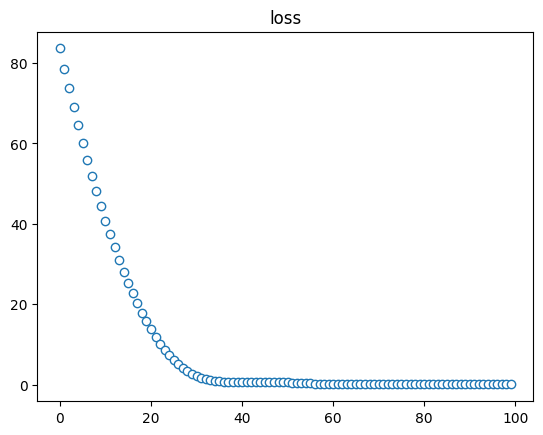

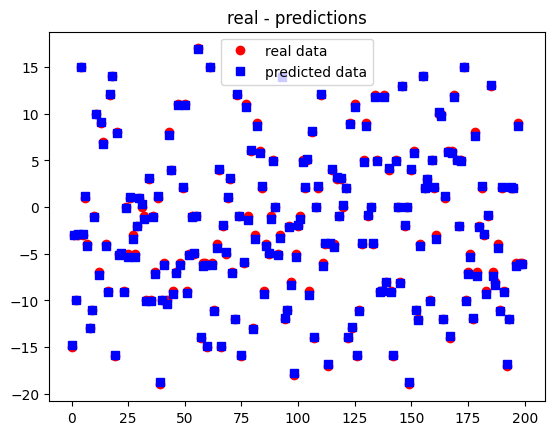

In [20]:

# 数据总数
DATA_LENGTH = 1000
# 训练数据比例
TRAIN_RATE = .8
# 测试数据比例
TEST_RATE = .2

# 隐藏节点数
UNIT = 40

# 训练次数
TRAIN_EPOCH = 100

data, labels = generate_data(DATA_LENGTH)
# showData(data,labels)
assert len(data) == DATA_LENGTH

train_data, test_data, train_labels, test_labels = prepare_data(
    data, labels, train_rate=TRAIN_RATE)

assert len(train_data) == (DATA_LENGTH *
                            TRAIN_RATE) and len(test_data) == (DATA_LENGTH*TEST_RATE)

model, loss, optimizer = createModel(units=UNIT)

data_t = torch.tensor(train_data, dtype=torch.float32)
label_t = torch.tensor(train_labels, dtype=torch.float32).reshape([800,1])


_loss =trainTheModel(epochs=TRAIN_EPOCH, model=model, loss=loss,
                optimizer=optimizer, data_t=data_t, labels=label_t)
            
showLoss(_loss)

predicitions = model(torch.tensor(test_data, dtype=torch.float32))

show_diff(test_labels,predicitions)

torch.save(model.state_dict(),'abc.pt')




In [21]:
r =model(torch.tensor([1.0,-6.0]))
print(r)

def enhanced_model(input,model):
    result = model(input)
    r =torch.round(result)
    return r

r1 =enhanced_model(torch.tensor([1.0,-5.0]),model)
r1


tensor([-5.3483], grad_fn=<AddBackward0>)


tensor([-4.], grad_fn=<RoundBackward0>)